In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('sfr_test.csv')

In [3]:
df.head()

,member_unique_id,gender,dob,eligible_year,eligible_month,affiliation_type,pbp_group,plan_name,npi,line_of_business,...,pcp_ffs,plan_premium,prof,reinsurance,risk_score_partd,rx,rx_rebates,rx_with_rebates,rx_without_rebates,spec_cap
0,1,F,21/06/1990,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,1,HMO,...,$0.00,"$3,507.00",$0.00,$7.92,$0.00,$0.00,$0.00,$0.00,$0.00,$843.78
1,2,M,02/01/1948,2020,202006,Affiliate,NON-SNP,NaN,1,HMO,...,$0.00,"$6,204.84",$0.00,$8.13,$0.00,"$11,289.69",$0.00,"$10,688.46","$10,859.82",$906.77
2,3,M,14/06/1948,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,1,HMO,...,$0.00,"$4,012.46",$0.00,$7.92,$0.00,$0.00,$0.00,$0.00,$0.00,$815.84
3,4,M,10/02/1954,2020,202006,Affiliate,D-SNP,MEDICARE - CARENEEDS,1,HMO,...,$0.00,"$9,770.61",$0.00,$8.30,$0.00,$73.88,$0.00,$62.87,$64.91,$846.26
4,5,M,31/12/1953,2020,202006,Affiliate,NON-SNP,NaN,1,HMO,...,$0.00,"$19,976.13","$8,875.80",$8.90,$0.00,$522.48,$0.00,$517.56,$606.01,$867.55


In [10]:
df = pd.read_csv('claims_test.csv')
print(df.shape)
df.head(10)

(52152, 5)


,MONTH,SERVICE_CATEGORY,CLAIM_SPECIALTY,PAYER,PAID_AMOUNT
0,201801,AncillaryFFS,NaN,Payer F,128438
1,201801,AncillaryFFS,NaN,Payer H,66624
2,201801,AncillaryFFS,NaN,Payer O,118108
3,201801,AncillaryFFS,NaN,Payer W,1073
4,201801,AncillaryFFS,ACH,Payer W,604
5,201801,AncillaryFFS,Advanced Registered Nurse Prac,Payer UN,0
6,201801,AncillaryFFS,ADVANCED RN PRACT,Payer CA,1772
7,201801,AncillaryFFS,AMBULANCE,Payer CA,446698
8,201801,AncillaryFFS,AMBULANCE,Payer CO,51664
9,201801,AncillaryFFS,AMBULANCE,Payer F,1083232


In [9]:
df.isna().sum()

MONTH                 0
SERVICE_CATEGORY      0
CLAIM_SPECIALTY     251
PAYER                 0
PAID_AMOUNT           0
dtype: int64

In [36]:
df.duplicated().sum()

0

In [11]:
df['MONTH'].unique()

array([201801, 201802, 201803, 201804, 201805, 201806, 201807, 201808,
       201809, 201810, 201811, 201812, 201900, 201901, 201902, 201903,
       201904, 201905, 201906, 201907, 201908, 201909, 201910, 201911,
       201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007])

In [12]:
df['SERVICE_CATEGORY'].unique()

array(['AncillaryFFS', 'ASCServices', 'ERServices', 'InpatientServices',
       'OutpatientServices', 'PCPEncounter', 'PCPFFS', 'SNFServices',
       'SpecialistFFS', 'SpecialistsFFS'], dtype=object)

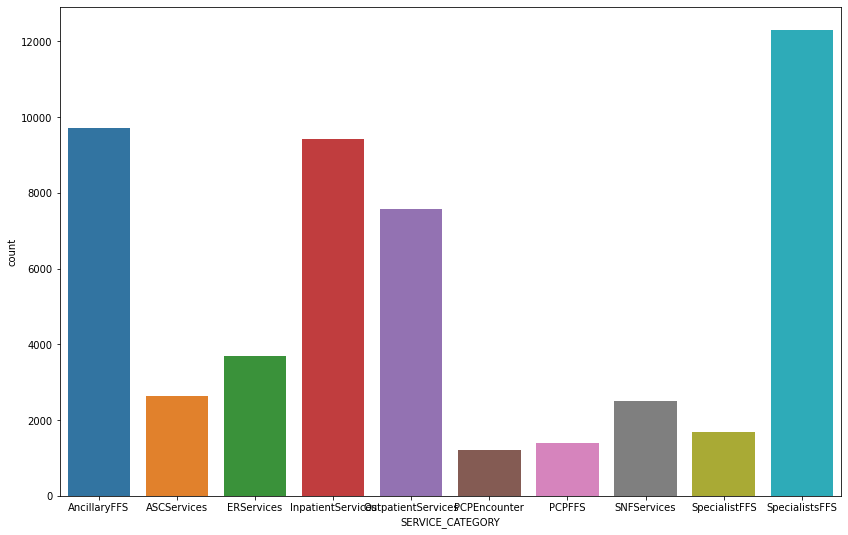

In [17]:
plt.figure(figsize=(14, 9))
sns.countplot(df['SERVICE_CATEGORY'])

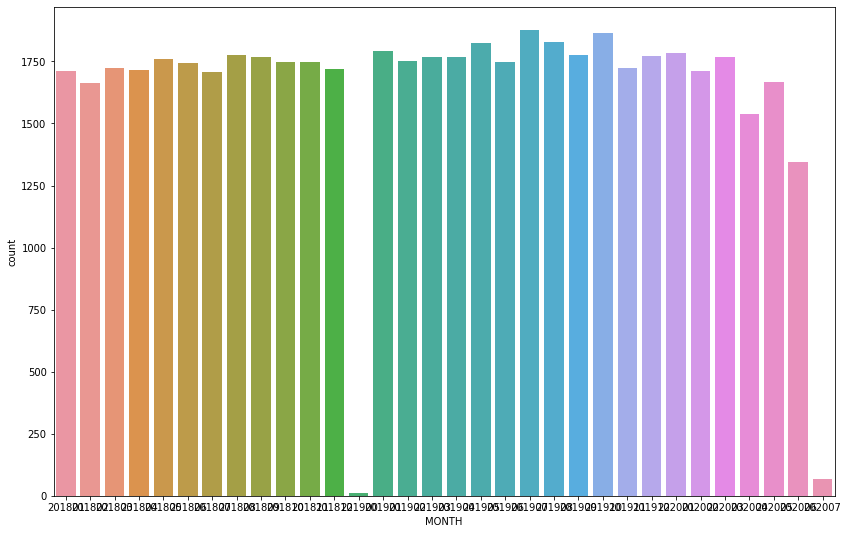

In [18]:
plt.figure(figsize=(14, 9))
sns.countplot(df['MONTH'])

In [22]:
df['MONTH'].value_counts().tail(5)

201802    1664
202004    1539
202006    1344
202007      67
201900      11
Name: MONTH, dtype: int64

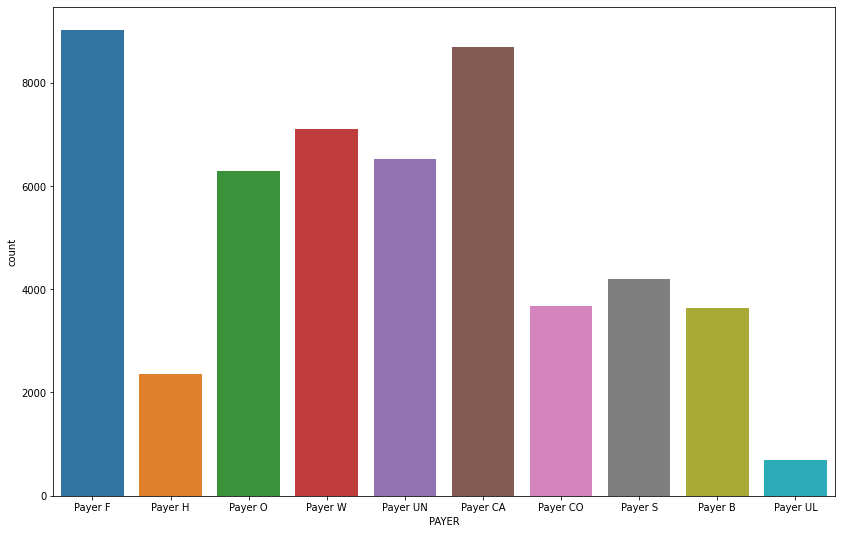

In [24]:
plt.figure(figsize=(14, 9))
sns.countplot(df['PAYER'])

In [32]:
len(df['CLAIM_SPECIALTY'].fillna('UNKNOWN').unique())

906

/home/ser/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


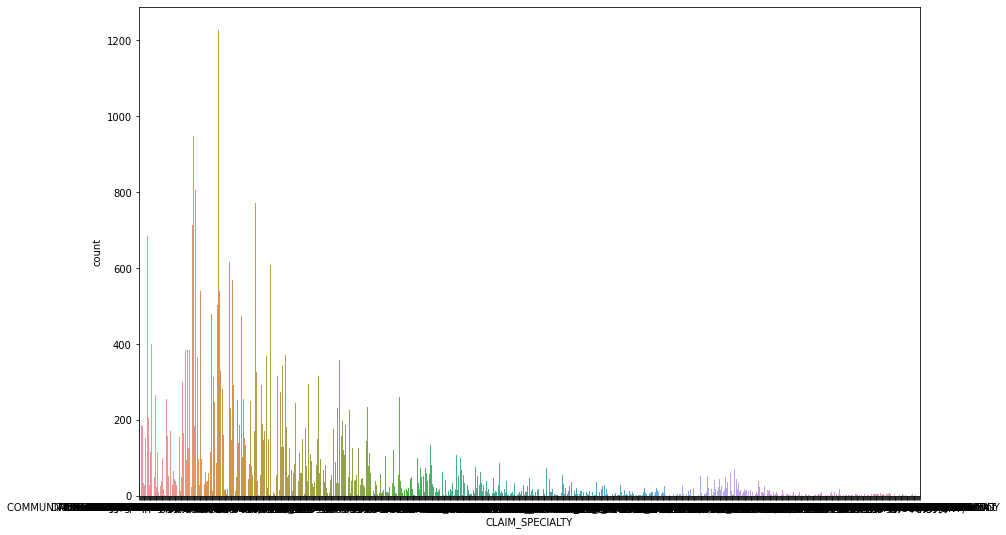

In [33]:
plt.figure(figsize=(14, 9))
sns.countplot(df['CLAIM_SPECIALTY'].fillna('UNKNOWN'));

In [34]:
df['PAID_AMOUNT'].describe()

count    5.215200e+04
mean     1.015469e+05
std      1.035692e+06
min     -1.689190e+05
25%      7.740000e+02
50%      3.731000e+03
75%      2.040950e+04
max      6.805834e+07
Name: PAID_AMOUNT, dtype: float64

In [38]:
df[df['PAID_AMOUNT'] < 0]

,MONTH,SERVICE_CATEGORY,CLAIM_SPECIALTY,PAYER,PAID_AMOUNT
26,201801,AncillaryFFS,Cardiology,Payer UN,-1000
46,201801,AncillaryFFS,Dermatology,Payer UN,-614
102,201801,AncillaryFFS,Geriatric Medicine,Payer UN,-803
103,201801,AncillaryFFS,GERIATRICS,Payer B,-811
144,201801,AncillaryFFS,Internal Medicine,Payer UN,-2120
...,...,...,...,...,...
49357,202005,AncillaryFFS,Physician Assistant,Payer UN,-785
49414,202005,AncillaryFFS,Rheumatology,Payer UN,-5496
50158,202005,PCPEncounter,FAMILY PRACTICE,Payer CA,-978
50165,202005,PCPEncounter,GENERAL PRACTICE,Payer CA,-568


In [48]:
df[df['PAID_AMOUNT'] >= 0]['PAID_AMOUNT'].describe()

count    5.182700e+04
mean     1.022122e+05
std      1.038899e+06
min      0.000000e+00
25%      8.010000e+02
50%      3.810000e+03
75%      2.066000e+04
max      6.805834e+07
Name: PAID_AMOUNT, dtype: float64

In [52]:
df[df['PAID_AMOUNT'] >= 0]['PAID_AMOUNT'].mean()

102212.19159897351

In [71]:
df.groupby('PAYER').agg({'PAID_AMOUNT': 'sum'})

,PAID_AMOUNT
PAYER,
Payer B,33423132
Payer CA,929447942
Payer CO,105056642
Payer F,2524398389
Payer H,634888053
Payer O,579204128
Payer S,66998959
Payer UL,3312099
Payer UN,125467835


In [72]:
df.groupby('SERVICE_CATEGORY').agg({'PAID_AMOUNT': 'sum'})

,PAID_AMOUNT
SERVICE_CATEGORY,
ASCServices,123586181
AncillaryFFS,494931510
ERServices,321032551
InpatientServices,2537560023
OutpatientServices,598584471
PCPEncounter,-143517
PCPFFS,104457187
SNFServices,220556450
SpecialistFFS,38825926


In [66]:
quantile = df[df['PAID_AMOUNT'] >= 0]['PAID_AMOUNT'].quantile(0.95)
df[df['PAID_AMOUNT'] > quantile]



,MONTH,SERVICE_CATEGORY,CLAIM_SPECIALTY,PAYER,PAID_AMOUNT
7,201801,AncillaryFFS,AMBULANCE,Payer CA,446698
9,201801,AncillaryFFS,AMBULANCE,Payer F,1083232
83,201801,AncillaryFFS,FAMILY PRACTICE,Payer F,279445
112,201801,AncillaryFFS,HOME HEALTH,Payer F,1981581
113,201801,AncillaryFFS,HOME HEALTH,Payer O,458309
...,...,...,...,...,...
52042,202006,SpecialistsFFS,RADIOLOGY,Payer F,480306
52076,202006,SpecialistsFFS,UROLOGY,Payer F,269094
52109,202007,InpatientServices,HOSPITAL,Payer H,666120
52135,202007,SpecialistsFFS,HEMATOLOGY/ONCOLOGY,Payer F,385195


In [53]:
df[df['PAID_AMOUNT'] >= 0]['PAID_AMOUNT'].median()

3810.0

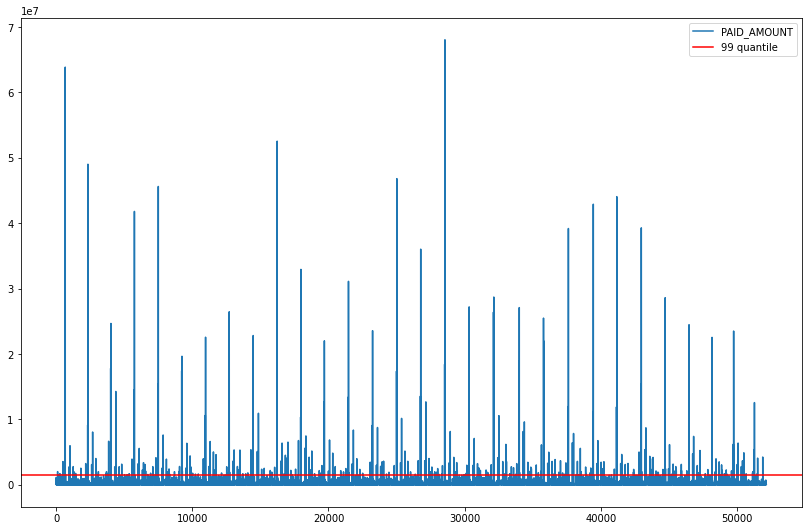

In [65]:
plt.figure(figsize=(14, 9))
df[df['PAID_AMOUNT'] >= 0]['PAID_AMOUNT'].plot()
plt.axhline(y=df[df['PAID_AMOUNT'] >= 0]['PAID_AMOUNT'].quantile(0.99), color='r', linestyle='-', label='99 quantile')
plt.legend()

In [23]:
df

,MONTH,SERVICE_CATEGORY,CLAIM_SPECIALTY,PAYER,PAID_AMOUNT
0,201801,AncillaryFFS,NaN,Payer F,128438
1,201801,AncillaryFFS,NaN,Payer H,66624
2,201801,AncillaryFFS,NaN,Payer O,118108
3,201801,AncillaryFFS,NaN,Payer W,1073
4,201801,AncillaryFFS,ACH,Payer W,604
...,...,...,...,...,...
52147,202007,SpecialistsFFS,RADIATION ONCOLOGY,Payer F,3475
52148,202007,SpecialistsFFS,REGISTERED NURSE,Payer H,395
52149,202007,SpecialistsFFS,RHEUMATOLOGY,Payer F,16089
52150,202007,SpecialistsFFS,SPECIAL SERVICES,Payer H,4256
